# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
    A linear regression model is the correlation between an independent variable and dependent variable using a straight line. 

- What type of machine learning is linear regression?
	A machine learning algorithm based on supervised learning. 

- What is a “line of best fit” using the OLS method?
	The line that shows minimal distance of the regression line to its data points.

- What is the difference between correlation and regression?
	Regression is the equation that explains the relationship of variables, correlation quantifies the strength of the linear relationship.
	
- Describe a scenario when you would use linear regression and why you would use it. 
	To find the correlation between income and spending on luxury products.


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity - The regression is linear in that the variables of the equation are summed up
- Normality - The error term is normally distributed 
- Homoscedasticity - Constant variance of the error value 
- No multicollinearity - No two or more variables should have high correlation
- No endogeneity - covariance of the error, assumed at 0
- No autocorrelation - The covariance of any two error terms, indicates if linear regression is appropriate. 


### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0) - The y-int of the regression line, predicted value when X=0. Basically a Constant variable doesn't change. 
- Coefficient of Independent Variable (B1) - For each one unit change in B1 the change in Y represents the difference in predicted value.
- Standard Error - The average distance that the observed values fall from the reg. line
- T-Statistic - Helps predict correlation between response and predictor variables. 
- P-Value of T-Statistic (from the independent variable) - Set at p=0.05 derived from the t-statistic as to whether coefficient is significantly different from zero.


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared - Describes how strong the regression is. R^2 = SSR/SST. Variability explained by the regression divided by the total variability.
- Adjusted R-squared - Changes considering additional variables, penalizes for excessive use.


- In this example, what's the name of the dependent variable and what is the name of the 
independent variable? 
(y = salary, b1 = years experience)
- In this example, how much of the variability in the data is explained by the model?
(p-value = 0, Also R^2 = .957. Variable is significant)
- What is the p-value of the t-statistic in this example? Is this result considered to be statistically significant?
(p-value = 0) (Yes, significant)
- What is the intercept/constant?
(b0 = intercept)
- What is the coefficient of the independent variable?
(9449.9623)

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [3]:
# make necessary imports

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

%matplotlib inline 

sns.set()

### Step 2: Explore the data 


In [4]:
# load data

df = pd.read_csv('house_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [5]:
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  2014-10-13  221900.0         3       1.00         1180   
1      6414100192  2014-12-09  538000.0         3       2.25         2570   
2      5631500400  2015-02-25  180000.0         2       1.00          770   
3      2487200875  2014-12-09  604000.0         4       3.00         1960   
4      1954400510  2015-02-18  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
20451  2997800021  2015-02-19  475000.0         3       2.50         1310   
20452   263000018  2014-05-21  360000.0         3       2.50         1530   
20453  6600060120  2015-02-23  400000.0         4       2.50         2310   
20454   291310100  2015-01-16  400000.0         3       2.50         1600   
20455  1523300157  2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  house_condition  grade  sqft_above  \
0        5650.0     1.0           0     1                3    7.0      1180.0   
1        7242.0     2.0           0     1                3    7.0      2170.0   
2       10000.0     1.0           0     1                3    6.0       770.0   
3        5000.0     1.0           0     1                5    7.0      1050.0   
4        8080.0     1.0           0     1                3    8.0      1680.0   
...         ...     ...         ...   ...              ...    ...         ...   
20451    1294.0     2.0           0     1                3    8.0      1180.0   
20452    1131.0     3.0           0     1                3    8.0      1530.0   
20453    5813.0     2.0           0     1                3    8.0      2310.0   
20454    2388.0     2.0           0     1                3    8.0      1600.0   
20455    1076.0     2.0           0     1                3    7.0      1020.0   

       sqft_basement  year_built  zipcode      lat     long  sqft_living_15  
0                  0      1955.0  98178.0  47.5112 -122.257            1340  
1                400      1951.0  98125.0  47.7210 -122.319            1690  
2                  0      1933.0  98028.0  47.7379 -122.233            2720  
3                910      1965.0  98136.0  47.5208 -122.393            1360  
4                  0      1987.0  98074.0  47.6168 -122.045            1800  
...              ...         ...      ...      ...      ...             ...  
20451            130      2008.0  98116.0  47.5773 -122.409            1330  
20452              0      2009.0  98103.0  47.6993 -122.346            1530  
20453              0      2014.0  98146.0  47.5107 -122.362            1830  
20454              0      2004.0  98027.0  47.5345 -122.069            1410  
20455              0      2008.0  98144.0  47.5941 -122.299            1020  

[20456 rows x 19 columns]

In [9]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.045600e+04  2.045600e+04  20456.000000  20456.000000  20456.000000   
mean   4.634802e+09  4.863355e+05      3.310422      2.032062   1942.120258   
std    2.877504e+09  2.398423e+05      0.855849      0.689049    724.345438   
min    1.000102e+06  3.209000e+03      1.000000      0.000000    370.000000   
25%    2.161850e+09  3.120000e+05      3.000000      1.500000   1390.000000   
50%    3.992700e+09  4.350000e+05      3.000000      2.000000   1840.000000   
75%    7.387500e+09  6.020000e+05      4.000000      2.500000   2410.000000   
max    9.900000e+09  1.640000e+06      6.000000      4.250000   4600.000000   

            sqft_lot        floors    waterfront          view  \
count   20456.000000  20456.000000  20456.000000  20456.000000   
mean    10302.509875      1.473455      0.004155      1.179165   
std     12700.282036      0.537955      0.064329      0.661116   
min       520.000000      1.000000      0.000000      1.000000   
25%      5000.000000      1.000000      0.000000      1.000000   
50%      7412.000000      1.000000      0.000000      1.000000   
75%     10022.250000      2.000000      0.000000      1.000000   
max    133729.000000      3.500000      1.000000      5.000000   

       house_condition         grade    sqft_above  sqft_basement  \
count     20456.000000  20456.000000  20456.000000   20456.000000   
mean          3.411322      7.514241   1679.184542     262.887808   
std           0.652286      1.026879    683.115368     390.859372   
min           1.000000      3.000000    300.000000       0.000000   
25%           3.000000      7.000000   1170.000000       0.000000   
50%           3.000000      7.000000   1500.000000       0.000000   
75%           4.000000      8.000000   2080.000000     520.000000   
max           5.000000     12.000000   3960.000000    1540.000000   

         year_built       zipcode           lat          long  sqft_living_15  
count  20456.000000  20452.000000  20456.000000  20456.000000    20456.000000  
mean    1969.985041  95297.064395     47.559194   -122.219543     1902.208594  
std       29.355600  15428.241686      0.139330      0.138576      585.143495  
min     1900.000000   9801.000000     47.155900   -122.512000      399.000000  
25%     1950.750000  98032.000000     47.467200   -122.332000     1460.000000  
50%     1972.000000  98072.000000     47.569650   -122.244500     1790.000000  
75%     1995.000000  98118.000000     47.679400   -122.134000     2260.000000  
max     2050.000000  98199.000000     47.777600   -121.315000     3790.000000

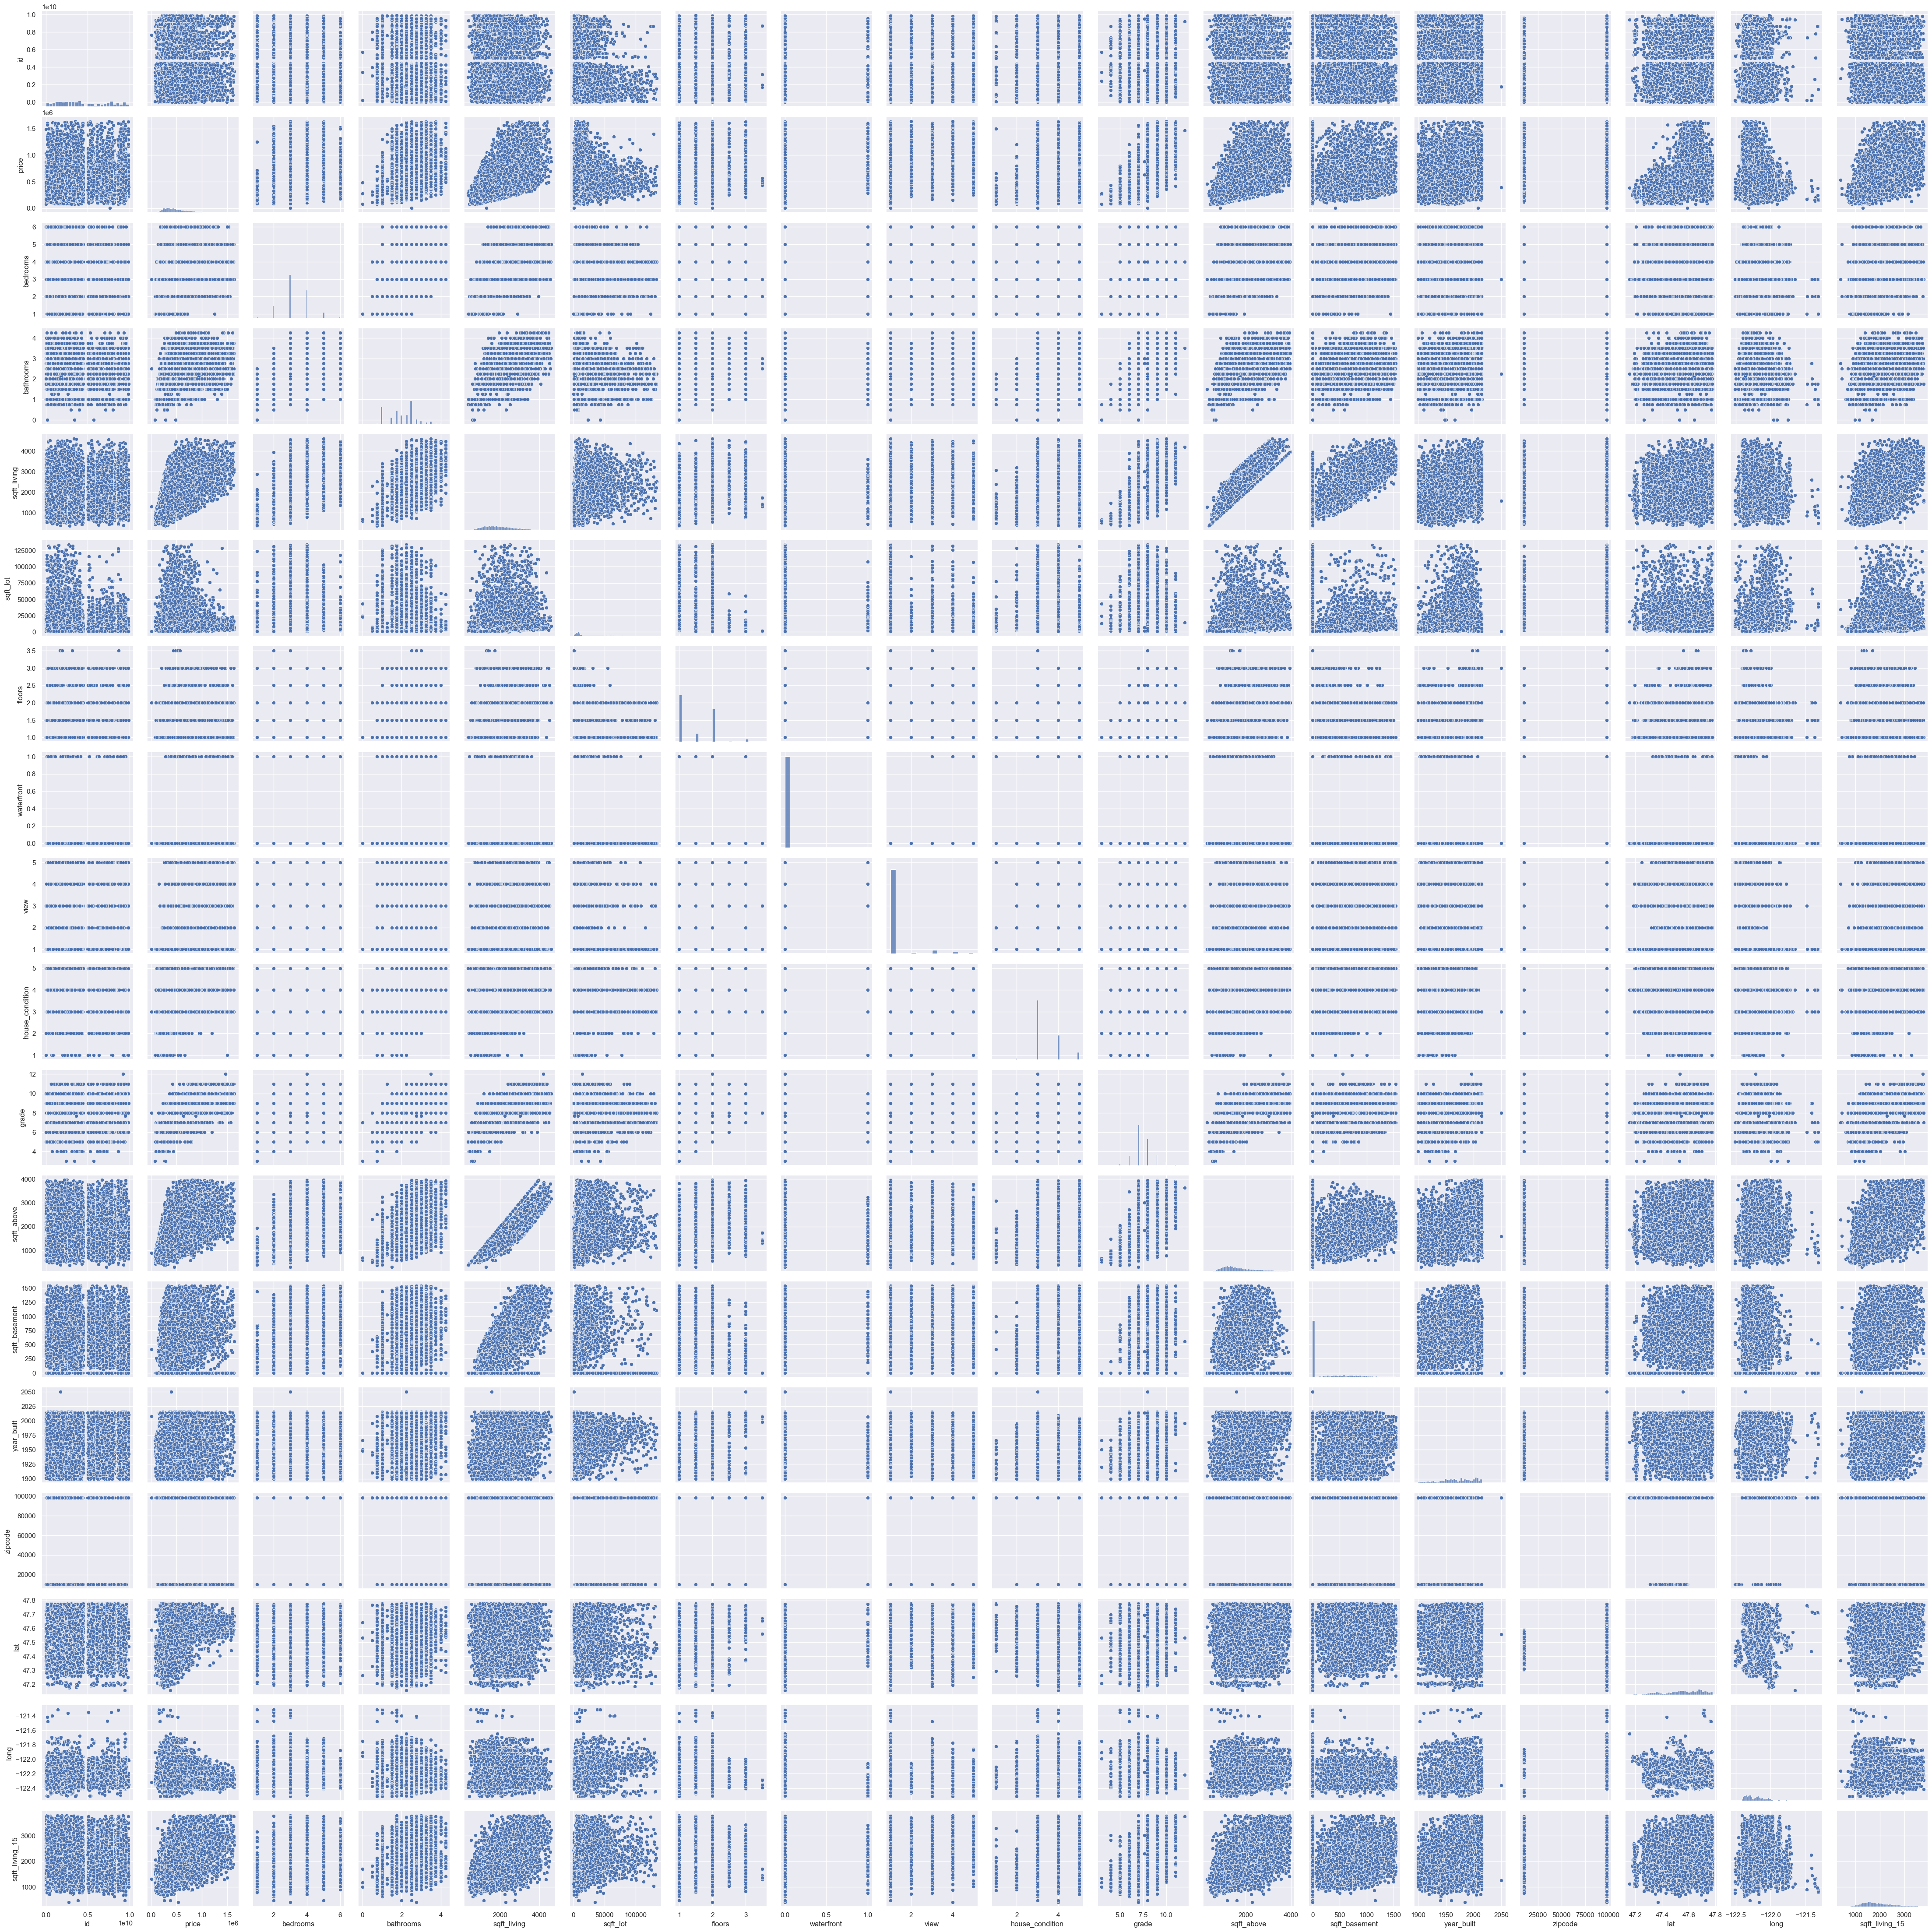

In [6]:
sns.pairplot(df);

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

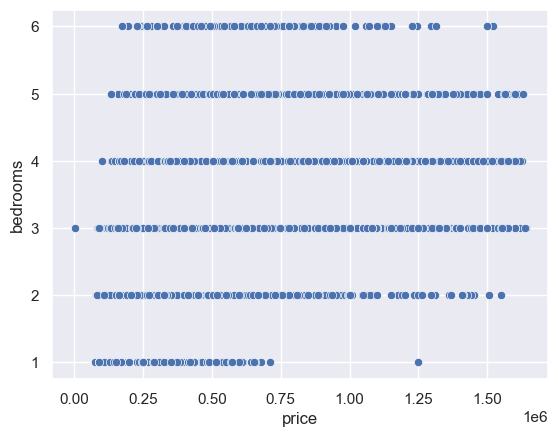

In [8]:
sns.scatterplot(x=df['price'], y=df['bedrooms'])

<AxesSubplot:xlabel='grade', ylabel='price'>

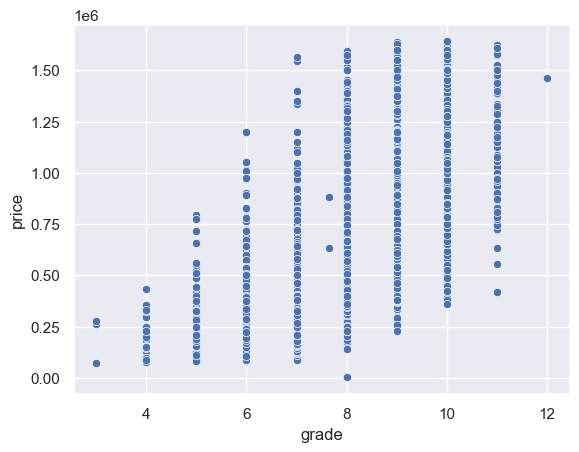

In [12]:
sns.scatterplot(x=df['grade'], y=df['price'])

<AxesSubplot:xlabel='view', ylabel='price'>

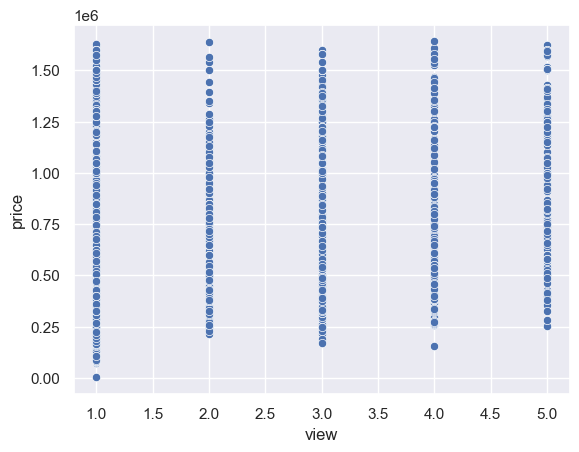

In [13]:
sns.scatterplot(x=df['view'], y=df['price'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

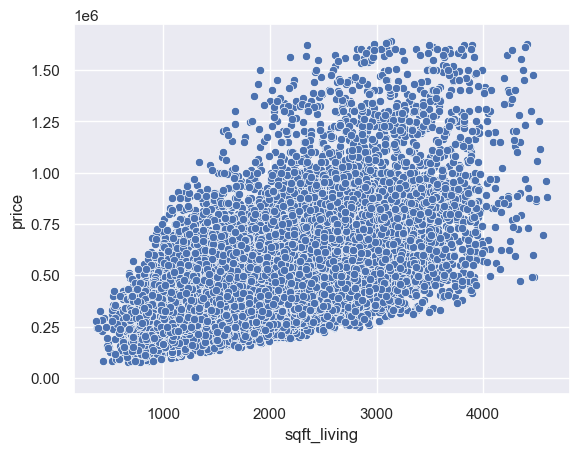

In [15]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])

In [19]:
crosstab = pd.crosstab(index=df['price'], columns=df['sqft_living', 'view', 'grade', 'bedroom'], 
plt.figure(figsize=(16,10))

ax = sns.heatmap(crosstab, annot=True, linewidths=.5, cmap='YlGnBu', fmt='g', xticklabels=['sqft_living'])

plt.xlabel("price", fontsize=14)
plt.ylabel("sqft_living", fontsize=14)

plt.title("Price to Sqft", fontsize=18);

SyntaxError: positional argument follows keyword argument (3024436589.py, line 4)

#### Spend time exploring the data and looking for relationships between variables. 

# explore data below (you will need to make new cells)

- I would look at Price as the dependent variable and the sqft_living independent variable.

### Step 3: Determine independent and dependent variable

In [21]:
# set X 
x1 = df['sqft_living']

# set Y
y = df['price']

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

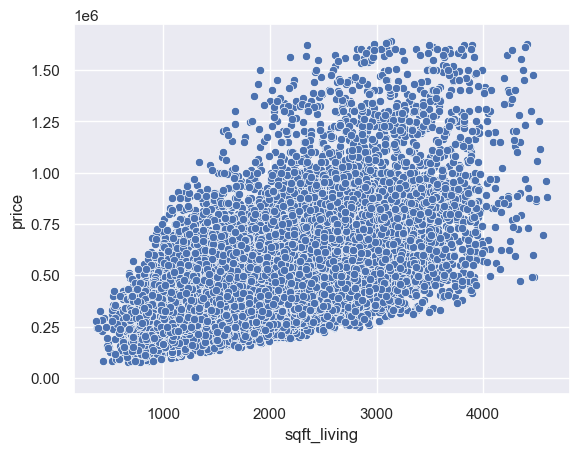

In [11]:
# visualize relationship between X and Y
sns.scatterplot(x=df['sqft_living'], y=df['price'])

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [22]:
# fit model to X and Y variables (you will need to make more cells)

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Fri, 09 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:09:24   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

In [9]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared = (0.376) 37.6% explanation betweeen ind. and dep. variables. Strong relationship.
- Coefficient of independent variable = (1.829) Rate of The change in x for every change in y.
- P-value of T-statistic = (0) Shows the model is statiscally significant.
- P-value of F-statistic = (0) Since the F-statistic is (67.21) since this number is quite. large relatively not close to zero and p-value is 0 then model is statiscally significant.

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [24]:
# predict new y values (dependent variables) by feeding model new independent variable values

new_df = pd.DataFrame({'constant':1, 'sqft_living':[1100, 2200]})
new_df

constant  sqft_living
0         1         1100
1         1         2200

In [25]:
predictions = results.predict(new_df)
predictions

0    315404.008401
1    538679.297060
dtype: float64

In [26]:
new_df['price_predictions'] = results.predict(new_df)
new_df

constant  sqft_living  price_predictions
0         1         1100      315404.008401
1         1         2200      538679.297060

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

# Pick another independent variable. Be sure to avoid multicollinearity. 

- My original pick was sqft_living as an independent variable, and my second choice was bedrooms however there seems to be conflict of mulitcollinearity. I will use grade to statisfy this assumption.

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [27]:
# fit new regression model (you will need to make more cells)

y = df['price']
x1 = df[['sqft_living', 'grade']]

In [30]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:13:17   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared - (0.452) 45.2% explanation btwn ind. and dep. varibales. Strong relationship. This increased from the original R^2 which shows that the second variable we added (grade) streghtened the relationship.
- Adjusted R-squared - (0.451) 45.1% We can note that the increase to strengthen our relationship also penalized us in our increase in variables. 
- Coefficient of independent variables - (113.22)sqft_living & (9.023e+04) grade. coefficient of sqft_living has decreased.
- P-value of T-statistic - (0) Statistically significant
- P-value of F-statistic - (0) statistically significant



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [40]:
# predict new y values (dependent variables) by feeding model new independent variable values

new_df = pd.DataFrame({'constant':1, 'sqft_living':[16500, 16500, 16500, 16500], 'grade':[7,7,7,10],})
new_df

constant  sqft_living  grade
0         1        16500      7
1         1        16500      7
2         1        16500      7
3         1        16500     10

In [41]:
new_df['price_predictions'] = results.predict(new_df)
new_df

constant  sqft_living  grade  price_predictions
0         1        16500      7       2.088241e+06
1         1        16500      7       2.088241e+06
2         1        16500      7       2.088241e+06
3         1        16500     10       2.358927e+06

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [16]:
# create new markdown cell and write down your observations


 - The mulitple linear regression model had a higher R-squared than the single model did. We observed that adding this "grade" variable it indeed did make our regression stronger. Also, we made sure that these two variables had not violated the multicollinearity assumption.

# Part 4 - Multivariate Time Series Analysis

In [17]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 